# ch2 Unsupervised Learning (자율학습)
- Mark수식 https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference 
- numpy 함수해설 http://blog.naver.com/PostView.nhn?blogId=wjddudwo209&logNo=220681277809&categoryNo=75&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

## 1 Clustering Algorithms (군집화 알고리즘)
- 데이터를 여러 부분집함으로 재구성
- 데이터 포인트 간의 Similarity를 정량화에 따른 군집화
 1. distribution Method 확률분포방식
 2. centroid Method 중심방식
 3. density Method 밀도방식
 4. hierachical Method 계층방식

### 01 distribution Method 확률분포방식

#### 1) EM 알고리즘 (기댓값 최대화 알고리즘) 
- <strong>$X^i$</strong> 와 연관된 <strong>'가우시안'구성요소 $Z^i$(은닉변수)</strong>를 찾는 <strong>자율 알고리즘</strong>
- E : <strong>Log 우도(log likelihood)</strong> 함수를 생성 (log 는 '오목함수'에 해당)
- M : E를 최대화 하기 위한 <strong>'파라미터'</strong> 값을 다시 계산한다

#### 2) 가우시안 혼합 (가우시안의 대표 모델 : 정규분포)
- 전체 데이터 집합에 대해 <strong>'정규분포'</strong> 모델로 만든다 

<img src="./img/emodel.png" align="left"></br></br>

EM 알고리즘은 반복적인(iterative) 방법을 이용하여 값을 추정하게 되는데 GMM(가우시안혼합모델) 에서는 이를 다음과 같이 처리한다.</br>
<br/>(출처 : http://norman3.github.io/prml/docs/chapter09/2.html)

1. Init-Step : 그림 (a) 와 같이 임의의 값으로 평균과, 분산을 초기화한다.
2. E-Step : 현재 파라미터의 값을 사용하여 사후 확률 γ(znk) (responsibilities) 를 구한다. (그림 (b))
3. M-Step : E-Step 에서 계산한 사후 확률 값을 이용하여 MLE를 통한 평균, 분산, 혼합 계수의 값을 다시 추정한다. (그림 (c))
4. iterative : 수렴 조건이 만족할 때까지 E-Step 과 M-Step 을 계속 반복 (그림 (d),(e),(f))
  - 보통 EM 알고리즘이 K-means 알고리즘에 비해 반복 횟수가 많다.
  - 때문에 K-means 알고리즘을 돌려 적절한 초기값을 설정한 뒤에 다시 수행하는 경우가 많다.
  - 앞서 설명한 대로 혼합 모델에서는 특이점 문제가 발생하지 않도록 주의를 기울여야 한다
  - 가우시안 분포에 한 점만 쏠리지 않도록 해야 한다.
5. EM 알고리즘은 <strong>전역 최적해(global solution)를</strong> 보장하지 않는다. 따라서 <strong>지역 최적해(local solution)</strong> 만을 얻을 수 있다.

### 02 centroid method 중심방식
- 군집의 중심과 포인트 간 최소거리를 찾는 방식

1. K-mean : <strong>로이드 알고리즘</strong>으로 <strong>유클리드 놈</strong> 거리를 최소화
    2. K-medians clusting : <strong>실제 데이터 포인트를 중심</strong>으로 군집의 중앙을 연산

#### K-mean
- <strong>Voronoi diagram (보로노이 다이어그램)</strong> : <strong>들로네 삼각분할</strong> (포인트 간의 내각이 최대가 되는 분할)의 외접원 중심을 연결한 면의분할 </br>
- E : <strong>유클리드 제곱거리 $ d = \sqrt{(x2-x1)^2} $ </strong> 의 <strong>최솟값 d</strong> 를 찾는 중심 인덱스를 찾는다</br>
- M : 중심 j 별로 dij를 갖는 포인트 평균이 중심 j의 값이 되도록 평균을 다시 계산</br>
- K-mean 알고리즘을 여러번 반복 : 볼록함수(convex function) 가 아니므로 최솟값을 보장할 수 없어서 반복실행

<img src = "./img/kmean.gif" align="left">

### 03 density method 밀도방식
- 밀도 기반 공간 군집화 방식을 활용 : 밀도가 특정조건 만족시 연결로 간주
- 밀도가 낮은 영역 : 경계 | 노이즈로 인식
- 밀도가 높은 영역 : 군집과 밀접

####  mean-shift 평균이동 
- <strong>$ f(x^i)$</strong>  의 최댓값
- 데이터집합에 대한 <strong> 밀도 커널 함수</strong> 의 <strong>지역최댓값</strong>을 찾는 <strong>비모수적 알고리즘</strong>
- <strong> 지역최댓값</strong>  : 군집의 중심
- <strong> 최댓값의 개수</strong>  : 군집의 개수
- <strong> h(대역폭)</strong>  : 유일한 파라미터를 현명하게 조절해야 한다

### 04 hierachical Method 계층방식
- <strong>분할방식</strong> : <strong>전체를 하나</strong>군집 $ >> $ 유사하지 않은 집단을 군집으로 <strong>분할</strong> (<strong>각 포인트가 하나의 군집</strong>이 될때까지 분할을 반복)
- <strong>병합방식</strong> : <strong>포인트별 하나</strong>군집 $ >> $ <strong>모든 데이터가 포함된 하나의 군집</strong>이 될때까지 반복
- 포인트간 결합조건 linkage criteria
  1. single linkage 단일결합 : 임의 요소간 최소거리
  2. complete linkage 완전결합 : 임의 요소간 최대거라
  3. average linkage 평균결합 : 임의 요소간 평균거리 $$ d(c1,c2)={1 \over |N1||N2|} \sum\sum d(c1,c2) $$   $$(|N1||N2|는 c1,c2의 요소갯수 )$$
  4. ward algorithm 와드 알고리즘 : <strong>분산 측정치 $\Delta (c1,c2) $의 최소 증가</strong>를 목표 (이질성이 증가하지 않게 파티션을 병합)
- 유클리드 거리함수를 가장 많이활용
  $$ d(c1,c2) = \sqrt{\sum(c1-c2)^2} $$ 

## 2 군집화 방법의 훈련과 비교

평균1 = [10,0] , 평균2 = [0,10], 공분산 = $\begin{bmatrix}3 & 1\\1 & 4\\\end{bmatrix}$ 인 정규분포

### 01 Drawing Graph & add Noise
https://matplotlib.org/examples/color/colormaps_reference.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(4711)

In [2]:
# Create Data
c1 = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,]) # [평균], [ 공분산 ], size = 인덱스
c2 = np.random.multivariate_normal([0,10],[[3,1],[1,4]], size=[100,]) # [평균], [ 공분산 ], size = 인덱스

In [3]:
print(c1.shape)
c1[:5]

(100, 2)


array([[  9.21188389,  -0.15188589],
       [  8.88937431,  -0.33937464],
       [ 10.76840064,   2.95244645],
       [  8.24213268,   1.29094802],
       [  5.7967009 ,  -5.83776714]])

In [4]:
print(c2.shape)
c2[:5]

(100, 2)


array([[  0.79934286,   9.28762072],
       [ -0.84336487,   9.14768305],
       [  2.68289165,  10.28231698],
       [ -1.9257809 ,   6.28116282],
       [  0.06693313,  13.13071039]])

In [5]:
# 정규분포를 따르는 노이즈 추가 (현실적 효과 추가)
np.random.seed(1)
noise1x = np.random.normal(0,2,100)
noise1y = np.random.normal(0,8,100)
noise2  = np.random.normal(0,8,100)
c1[:,0] += noise1x
c1[:,1] += noise1y
c2[:,1] += noise2

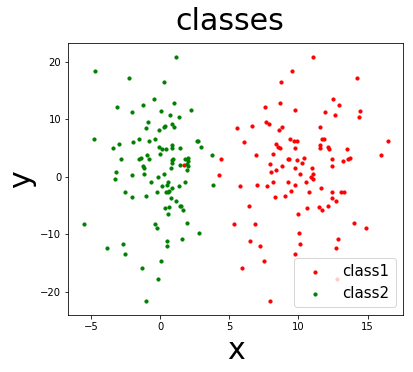

In [6]:
# Drawing Graph
fig = plt.figure(figsize = (6,5))
ax  = fig.add_subplot(111)
ax.set_xlabel('x', fontsize=30)
ax.set_ylabel('y', fontsize=30)
pp1 = ax.scatter(c1[:,0], c1[:,1], cmap='prism', s=10, color= 'r')
pp2 = ax.scatter(c2[:,0], c1[:,1], cmap='prism', s=10, color= 'g')
ax.legend((pp1,pp2), ('class1','class2'), fontsize=15)  # tuple로 이름을 특정한다
fig.suptitle('classes', fontsize=30)
# fig.savefig('./img/classes.png')

### 02 Drawing Graph & add Noise 2
정규분포를 따르는 Noise 추가

K 평균함수와 Gaussian 혼합모델 (클러스터 개수 지정이 필요 n_clusters = 2)

평균이동 알고리즘 대역폭 MeanShift(bandwidth=7)

In [7]:
% matplotlib inline
from sklearn import mixture
from sklearn.cluster import KMeans, MeanShift
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# 자료분석을 위한 데이터를 정의
X = np.concatenate((c1,c2),)
X.shape

(200, 2)

In [8]:
# K-mean 설정 1 (클러스터 갯수를 지정)
kmeans = KMeans(n_clusters = 2) 
kmeans.fit(X)
pred_kmeans = kmeans.labels_
print(pred_kmeans.shape)

(200,)


In [9]:
# K-mean 설정 2 (클러스터 갯수를 지정)
# mean-shift (평균이동 알고리즘 (대역폭 지정))
ms = MeanShift(bandwidth=7)
ms.fit(X)
pred_ms = ms.labels_

In [10]:
# 가우시안 혼합모델 설정 1 (클러스터 갯수를 지정)
# http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
#g = mixture.GMM(n_components= 2)
g = mixture.GaussianMixture(n_components= 2)
g.fit(X)
pred_gmm = g.predict(X)

In [11]:
# 가우시안 혼합모델 설정 2
# hierarchical(계층적) : generate the linkage matrix
# ward 연결방법 (유사도 측정방법) >> http://rfriend.tistory.com/227
Z = linkage(X,'ward')
max_d = 110
pred_h = fcluster(Z, max_d, criterion='distance')

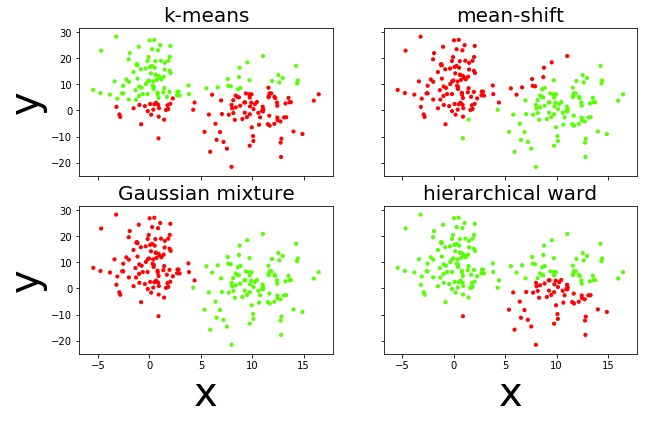

In [12]:
# plt를 reset & 4개의 그림판을 준비
fig = plt.figure(figsize = (6,8))#; fig.clf()
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2, sharex='col', sharey='row')
# plot points with cluster dependent colors
axis1.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap='prism',s = 10)
axis1.set_ylabel('y',fontsize = 40); axis1.set_title('k-means',fontsize = 20)
# K-mean 설정 2 (클러스터 갯수를 지정)
axis2.scatter(X[:,0], X[:,1], c = pred_ms, cmap = 'prism',s = 10)
axis2.set_title('mean-shift', fontsize = 20)
# 가우시안 혼합모델 설정 1 (클러스터 갯수를 지정)
axis3.scatter(X[:,0], X[:,1] ,c = pred_gmm, cmap='prism', s = 10)
axis3.set_xlabel('x', fontsize = 40); axis3.set_ylabel('y', fontsize = 40)
axis3.set_title('Gaussian mixture', fontsize = 20)
# 가우시안 혼합모델 설정 2
axis4.scatter(X[:,0], X[:,1], c = pred_h, cmap='prism',s = 10)
axis4.set_xlabel('x',fontsize = 40); axis4.set_title('hierarchical ward', fontsize = 20)
fig.set_size_inches(10, 6)

### 03 Hierarchical Clustering Dendrogram (계층 군집화 계통수 구하기)
'last p' 최종 병합 클러스터 갯수가 기준

p = 12. 최종 병합 클러스터 갯수 

In [13]:
# 분석할 데이터 자료형
from scipy.cluster.hierarchy import linkage
X = np.concatenate((c1,c2),)
Z = linkage(X,'ward')

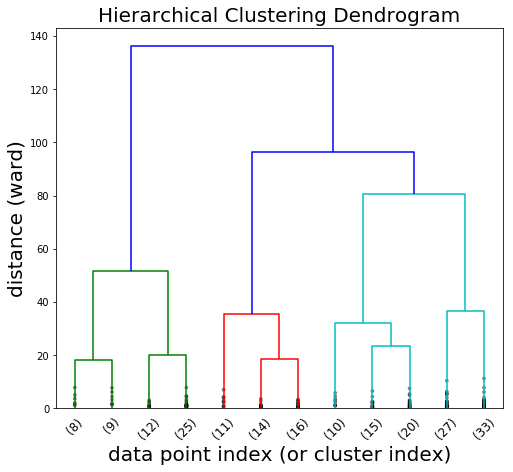

In [14]:
from scipy.cluster.hierarchy import dendrogram
#reset plt
fig.clf()
fig = plt.figure(figsize=(8,7))
plt.title('Hierarchical Clustering Dendrogram',fontsize=20)
plt.xlabel('data point index (or cluster index)',fontsize=20)
plt.ylabel('distance (ward)',fontsize=20)
dendrogram(Z, p = 12,          # p = 12. 최종 병합 클러스터 갯수 
    truncate_mode = 'lastp',   # 'last p' 최종 병합 클러스터 갯수를 기준 
    leaf_font_size = 12.,       
    leaf_rotation = 45.,       # 하단 index label의 표시각도
    show_contracted = True,)
plt.show()
# fig.savefig('./img/dendrogram.png')

### 04 군집화 알고리즘의 품질 측정
- gaussian mixture model measures 이 가장 강건한 방식에 해당
- 동질성 점수 ( 0 < res[0] < 1) : 각 군집이 하나의 클래스 여부를 측정
- 완전성 점수 ( 0 < res[1] < 1) : 하나의 클래스 모든 요소가 같은 군집 배정여부를 정량화
- 실루엣 점수 ( -1< res[2] < 1) : '소속 군집맴버 유사성'과 '타 군집의 맴버간 유사성' 계산 (1에 가까울수록 유사군집이 잘 분류)

In [15]:
# 자료분석을 위한 데이터를 정의
l1 = np.zeros(100)
l2 = np.ones(100)
labels = np.concatenate((l1,l2),)

In [16]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score

# K-meand 의 품질측정
res = homogeneity_completeness_v_measure(labels, pred_kmeans)
print('res :', res)
print ('<<kmeans measures 측정>>', 
       '\nhomogeneity (동질성):',res[0],
       '\ncompleteness (완전성):',res[1],
       '\nv-measure (V 척도):',res[2],
       '\nsilhouette score (실루엣 점수):',silhouette_score(X,pred_kmeans))

res : (0.25910415427998396, 0.25940362642941056, 0.25925380387232266)
<<kmeans measures 측정>> 
homogeneity (동질성): 0.25910415428 
completeness (완전성): 0.259403626429 
v-measure (V 척도): 0.259253803872 
silhouette score (실루엣 점수): 0.409469791511


In [17]:
# Mean-shift 의 품질측정
res = homogeneity_completeness_v_measure(labels,pred_ms)
print ('<<mean-shift measures 측정>>', 
       '\nhomogeneity (동질성):',res[0],
       '\ncompleteness (완전성):',res[1],
       '\nv-measure (V 척도):',res[2],
       '\nsilhouette score (실루엣 점수):',silhouette_score(X,pred_ms))

<<mean-shift measures 측정>> 
homogeneity (동질성): 0.657373750073 
completeness (완전성): 0.662158204648 
v-measure (V 척도): 0.65975730345 
silhouette score (실루엣 점수): 0.40117810244


In [18]:
# 가오시안 혼합모델 품질측정
res = homogeneity_completeness_v_measure(labels,pred_gmm)
print ('<<gaussian mixture model measures>>',
       '\nhomogeneity (동질성):',res[0],
       '\ncompleteness (완전성):',res[1],
       '\nv-measure (V 척도):',res[2],
       '\nsilhouette score (실루엣 점수):',silhouette_score(X,pred_gmm))

<<gaussian mixture model measures>> 
homogeneity (동질성): 0.928991170482 
completeness (완전성): 0.929259315921 
v-measure (V 척도): 0.929125223855 
silhouette score (실루엣 점수): 0.379655885665


In [19]:
# 계층도 모델 품질측정
res = homogeneity_completeness_v_measure(labels,pred_h)
print ('<<hierarchical (ward) measures>>',
       '\nhomogeneity (동질성):',res[0],
       '\ncompleteness (완전성):',res[1],
       '\nv-measure (V 척도):',res[2],
       '\nsilhouette score (실루엣 점수):',silhouette_score(X,pred_h))

<<hierarchical (ward) measures>> 
homogeneity (동질성): 0.302367273976 
completeness (완전성): 0.359334499592 
v-measure (V 척도): 0.32839867574 
silhouette score (실루엣 점수): 0.356446705251


## 3 차원의 축소 1
PCA 주성분 분석 (Principal Component Analysis)

주성분 : 다차원 데이터들의 분산이 가장 큰 방향벡터 (출처: http://darkpgmr.tistory.com/110)

데이터 집합의, 주요 정보가 포함된 부분 공간을 식별
  1. 비상관 차원 (uncorrelated)이 큰 데이터 묶음을 찾음
  2. 상관(correlation)이 크면 <strong>한개의 변수 관계</strong>로 변환해 차원을 축소한다

### 차원의 축소
복잡도는 줄이면서, 중요한 정보는 유지하는 광범위한 기술 유형 https://wikidocs.net/7646

<strong>차원의 저주</strong> : 관찰한 데이터의 차원이 증가할수록 volume의 증가로 빈 공간이 많아진다. 그만큼 불필요한 데이터가 남아있게 됨

 $$ Y = wx_1 + wx_2 + b $$
 $$ Y = 2x_1 + wx_2 + b $$

    차원 축소란  x와 y로 된 이차원의 데이터를 1차원으로 줄이는 방법을 말합니다.
    이때, 기존의 x, y 차원 대신에 데이터를 표현할 새로운 1차원 벡터를 구하기 위해, PCA에서는 고유벡터를 새로운 차원의 벡터로 사용합니다..
    고유벡터를 사용하는 이유는 데이터들을 투영했을 때 분산이 가장 큰 직선으로 데이터를 가장 잘 설명하기 때문입니다.
    이 예시에서 고유벡터는 y =2x 상에 있는 임의의 벡터가 될 것 같습니다. (고유 벡터는 유일하지 않고 여러 표현이 가능하니까요)

CHAPTER 6 … 차원 축소_151  # 알고리즘 중심의 머신러닝 가이드 파이썬 코드 기반 

    6.1 선형 판별 분석 153
    6.2 주성분 분석 157
    6.2.1 다층 퍼셉트론과의 관계 161
    6.2.2 커널 PCA 162
    6.3 인자 분석 164
    6.4 독립 성분 분석 167
    6.5 지역 선형 임베딩 168
    6.6 아이소맵 172
    6.6.1 다차원 스케일링 172
    ㆍ 더 읽을거리 174
    ㆍ 연습 문제 175 

### 01 PCA 그래프 그리기
PCA 주성분 분석 (Principal Component Analysis)

In [20]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt

# line y = 2*x    # 직선 위 랜덤한 데이터를 추출
x = np.arange(1,101,1).astype(float)
y = 2 * np.arange(1,101,1).astype(float)

In [21]:
# add noise
noise = np.random.normal(0, 10, 100) # np.random.normal(평균, 표준편차, 배열요소 갯수)
y += noise
print("평균",noise.mean(),"\n표준편차",noise.std(),"\n자료갯수",len(noise) )

평균 -0.602862549782 
표준편차 9.71509227289 
자료갯수 100


In [22]:
# #plot 그리기
# fig = plt.figure(figsize=(10,10))
# plt.plot(x,y,'ro')
# # plt.quiver()벡터장을 그려주는 함수
# plt.quiver(60, 100,10-0, 20-0, scale_units='xy', scale=1)
# plt.arrow(60, 100,10-0, 20-0,  head_width=2.5,   head_length=2.5, fc='k', ec='k')
# plt.axis([0,102, -20,220]); plt.text(70, 110, r'$v^1$', fontsize=20)

<< quiver 함수 결과가 arrow와 다른 이유 >> </br>
<p>먼저 벡터장 함수인 quiver 함수에서 figure의 aspect ratio (즉, 가로 세로 비율)이 1이 아닌 경우에</p></br>
<p>벡터가 정확히 맞지 않게 출력이 됩니다. (아래 링크 확인해 보시고요)</p></br>
http://stackoverflow.com/questions/36534381/understanding-matplotlibs-quiver-plotting
<p>그래서, 예시에서 x축이 102, y축이 240인데 동일한 크기로 맞추면 arrow 함수 결과와 같은 결과가 나옵니다.</p></br> 
<p>반대로, 예시에서 quiver의 방향을 arrow와 맞추고 싶으면 이렇게 aspect ratio를 y 성분에 곱해주면 됩니다.</p></br>
<p>길이가 같지는 않지만요. plt.quiver(60,100, 10, 20*102/240, scale_units='xy', scale=1)</p></br>

In [23]:
x.shape

(100,)

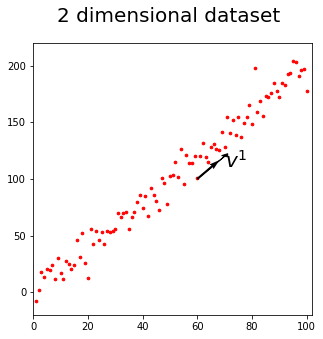

In [24]:
#plot 그리기
fig = plt.figure(figsize=(5,5))
fig.suptitle('2 dimensional dataset',fontsize=20)
plt.scatter(x, y, s=7, c='r')#,'ro')
#plt.plot(x,y,'ro',)
plt.axis([0,102, -20,220])
# plt.quiver()벡터장을 그려주는 함수  (* 102/240 : axis의 화면배율을 보정)
plt.quiver(60,100, 10, 20 * 102/240, scale_units='xy', scale=1)
plt.arrow(60, 100, 10-0, 20-0,  head_width=2.5,   head_length=2.5, fc='k', ec='k')
plt.text(70, 110, r'$v^1$', fontsize=20); plt.show()
# fig.savefig('./img/pca_data.png')

### 02 PCA 계산하기 1
Numpy를 활용한 주성분 찾기

np.linalg.eig(sigma)

In [25]:
# calc PCA
# 평균의 계산
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_vector = np.array([[mean_x],[mean_y]])
print("벡터의 평균값 계산", 
      "\nX 데이터 집합 평균",mean_vector[0],
      "\nY 데이터 집합 평균",mean_vector[1])

벡터의 평균값 계산 
X 데이터 집합 평균 [ 50.5] 
Y 데이터 집합 평균 [ 100.39713745]


In [26]:
# np.cov(x,y) : 표준편차를 계산
u_x = (x- mean_x)/np.std(x)
u_y = (y-mean_y)/np.std(y)
sigma = np.cov([u_x,u_y]); sigma

array([[ 1.01010101,  0.99599252],
       [ 0.99599252,  1.01010101]])

In [27]:
# np.linalg.eig() : 정사각 행렬의 고유 값과 고유벡터를 계산한다.
eig_vals, eig_vecs = np.linalg.eig(sigma)
print("eig_vals (고유 값을 출력)\n", eig_vals,
      "\neig_vecs (고유 벡터를 출력)\n", eig_vecs)

eig_vals (고유 값을 출력)
 [ 0.01410849  2.00609353] 
eig_vecs (고유 벡터를 출력)
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [28]:
# 스칼라 값과, 벡터행렬을 합치기
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])
             for i in range(len(eig_vals))]             
eig_pairs

[(0.014108493007258804, array([-0.70710678,  0.70710678])),
 (2.0060935271947615, array([-0.70710678, -0.70710678]))]

In [29]:
# np.sort() : 기본값 오름차순 정렬
#eig_pairs.sort() 
#eig_pairs.sort(reverse=False)
#eig_pairs.reverse()

# np.sort() : 내림차순 정렬
eig_pairs.sort(reverse=True)
eig_pairs

[(2.0060935271947615, array([-0.70710678, -0.70710678])),
 (0.014108493007258804, array([-0.70710678,  0.70710678]))]

In [30]:
# 가장 값이 큰 고유값과
v0 = eig_pairs[0][0]
# 가장 값이 큰 연관벡터를 출력
v1 = eig_pairs[0][1]

# 주성분이 직선에 놓여있는지를 기울기로 확인
# 원래의 데이터 크기값으로 변환
#leading eigenvector:
x_v1 = v1[0]*np.std(x)+mean_x
y_v1 = v1[1]*np.std(y)+mean_y
print ('slope:',(y_v1)/(x_v1))

slope: 1.96629526702


### 03 PCA 계산하기 2
sklearn 를 활용한 주성분 찾기

벡터값 일치여부 확인

In [31]:
# 데이터를 벡터로 변환
X = np.array([u_x,u_y]); 

# 데이터를 행렬구조로 변환
X = X.T 
print(X.shape, '\n', X[:5])

(100, 2) 
 [[-1.71481604 -1.84902666]
 [-1.68017329 -1.68258985]
 [-1.64553055 -1.41741617]
 [-1.6108878  -1.49556164]
 [-1.57624505 -1.37309387]]


In [32]:
# sklearn 의 PCA 모듈을 활용
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

print("PCA 계산한 일치도", pca.explained_variance_ratio_)
print("PCA 계산한 크기값", pca.explained_variance_)
print("pca 연산결과 단위벡터", pca.components_)
pca.noise_variance_

PCA 계산한 일치도 [ 0.9930163]
PCA 계산한 크기값 [ 1.98603259]
pca 연산결과 단위벡터 [[-0.70710678 -0.70710678]]


0.013967408077186171

### 04 Numpy 와 Sklearn 의 결과 비교하기
주성분 찾기

In [33]:
# PCA Fit 을 통한 : 두 벡터의 비교값 출력
X_red_sklearn = pca.fit_transform(X)
X_red_sklearn.shape

(100, 1)

In [34]:
# 벡터의 곱을 통한 : 두 벡터의 비교값 출력
W = np.array(v1.reshape(2,1))
X_red = W.T.dot(X.T)
X_red.shape

(1, 100)

In [35]:
# Assert 디버깅 명령
# 사용자가 입력한 문자의 내용으로 Debug 메세지를 출력한다
# assert 2 == 3 , " 2 is not 3"

#check the reduced matrices are equal
# assert : 조건에 해당하지 않을 때 Debug 를 표시
assert X_red.T.all() == X_red_sklearn.all(), 'problem with the pca algorithm'
print (X_red.T[0],'-',X_red_sklearn[0], "\n=",X_red.T[0]-X_red_sklearn[0] )

[ 2.52001734] - [ 2.52001734] 
= [  2.66453526e-15]


### 02. 특이값 분해
- 고유값분해(eigendecomposition)에의 고유값은 변환에 의해 불변인 방향벡터(-> 고유벡터)에 대한 스케일 factor이고
- 특이값은 변환 자체의 스케일 factor로 볼 수 있다.

$ 0 = c_x-a_{x0}-d_{x0}\dfrac{(c_x-a_{x0})\cdot d_{x0}}{\|d_{x0}\|^2} $

$\sum_{n=1}^\infty \frac{1}{n^2} \to
  \textstyle \sum_{n=1}^\infty \frac{1}{n^2} \to
  \displaystyle \sum_{n=1}^\infty \frac{1}{n^2}$